# 6.3 Geographical Visualizations with Python
### New York Citi Bikes

## 01 Import Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# Import .json File
country_geo = r'C:/Users/cshat/Desktop/Career Foundry Course/Part 6/6.3/us-states.json'

In [3]:
country_geo

'C:/Users/cshat/Desktop/Career Foundry Course/Part 6/6.3/us-states.json'

In [4]:
# Set Path
path = r'C:\Users\cshat\09-2023 Citi Bikes Project'

In [5]:
# Import Data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'citibike_clean.csv'), index_col = False)

In [6]:
df.head()

,Unnamed: 0,day_of_week,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
0,0,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2
1,1,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1
2,2,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1
3,3,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2
4,5,Fri,22,2013-09-27 22:01:01,293,Lafayette St & E 8 St,40.730287,-73.990765,2013-09-27 22:08:08,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,2


In [7]:
df.shape

(42975, 17)

## 02 Prepare Data (Subset, Wrangle, Clean)

In [8]:
# Pick Columns for Subset
df.columns

Index(['Unnamed: 0', 'day_of_week', 'start_hour', 'start_time',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender'],
      dtype='object')

In [9]:
columns = ['day_of_week', 'start_hour', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'subscriber', 'birth_year', 'gender']

In [10]:
# Create Subset
df_spatial = df[columns]

In [11]:
df_spatial.head()

,day_of_week,start_hour,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,subscriber,birth_year,gender
0,Mon,18,W 38 St & 8 Ave,40.754666,-73.991382,W 20 St & 7 Ave,40.742388,-73.997262,Subscriber,1968.0,2
1,Thu,18,Lispenard St & Broadway,40.719392,-74.002472,St Marks Pl & 2 Ave,40.728419,-73.987140,Subscriber,1983.0,1
2,Wed,19,9 Ave & W 45 St,40.760193,-73.991255,W 56 St & 10 Ave,40.768254,-73.988639,Subscriber,1989.0,1
3,Sat,11,E 33 St & 1 Ave,40.743156,-73.974347,E 52 St & 2 Ave,40.756014,-73.967416,Subscriber,1988.0,2
4,Fri,22,Lafayette St & E 8 St,40.730287,-73.990765,E 7 St & Avenue A,40.726218,-73.983799,Subscriber,1986.0,2


In [12]:
df_spatial.shape

(42975, 11)

In [13]:
# Check for Null Values
df_spatial.isnull().sum()

day_of_week                0
start_hour                 0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
subscriber                 0
birth_year                 0
gender                     0
dtype: int64

No missing values found.

In [14]:
# Check for Extreme Values
df_spatial.describe()

,start_hour,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,birth_year,gender
count,42975.000000,42975.000000,42975.000000,42975.000000,42975.000000,42975.000000,42975.000000
mean,14.085678,40.734477,-73.990947,40.734070,-73.991241,1975.693031,1.247772
std,4.933038,0.019599,0.012368,0.019601,0.012376,10.903197,0.431831
min,0.000000,40.680342,-74.017134,40.680342,-74.017134,1934.000000,0.000000
25%,10.000000,40.721101,-74.000040,40.720828,-74.000271,1968.000000,1.000000
50%,15.000000,40.736245,-73.990765,40.735877,-73.990985,1978.000000,1.000000
75%,18.000000,40.749718,-73.981923,40.749013,-73.982578,1984.000000,1.000000
max,23.000000,40.770513,-73.950048,40.770513,-73.950048,1997.000000,2.000000


The max/min values for each variable make sense. However, I will create a visual of one of these variables for the sake of the exercise. 

<Axes: xlabel='birth_year', ylabel='Count'>

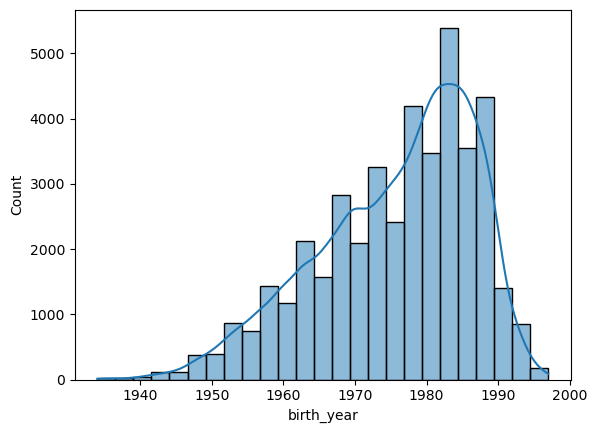

In [15]:
sns.histplot(df_spatial['birth_year'], bins = 25, kde = True)

No extreme values found.

## 03 Create Map

### Note
This data set only contains data from within the state of New York and therefore it cannot be visualized on a map as this task is requesting. For the sake of the exercise, I will generate a map using station in place of where we'd usually put state. However, it will not yield any useful information.

In [16]:
start_station_start_time = df_spatial[['start_station_name','start_hour']]

In [17]:
start_station_start_time

,start_station_name,start_hour
0,W 38 St & 8 Ave,18
1,Lispenard St & Broadway,18
2,9 Ave & W 45 St,19
3,E 33 St & 1 Ave,11
4,Lafayette St & E 8 St,22
...,...,...
42970,W 21 St & 6 Ave,15
42971,Spruce St & Nassau St,16
42972,Johnson St & Gold St,17
42973,Broadway & E 22 St,18


In [18]:
map = folium.Map(location = [40, -95], zoom_start = 4)

folium.Choropleth(
    geo_data = country_geo, 
    data = start_station_start_time,
    columns = ['start_station_name','start_hour'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "start_hour").add_to(map)

folium.LayerControl().add_to(map)

map

As expected, this analysis provided no useful results because there was no state variable in the data set. 

## 04 Key Questions

### Who is using NYCB? Most/least common customer age, gender, and subscription status. Habit differences between customer demographics.

The output of this task yielded no new information to answer this question.

### When is NYCB being used? Most/least busy days of week and times of day.

The output of this task yielded no new information to answer this question.

### Where is NYCB being used? Most/least popular stations.

Answering this question will require a different kind of spatial analysis that looks at New York specifically. The data set does include longitude/latitude data for the bike stations which means other kinds of spatial analysis may be possible.

### Descriptive statistics for each variable. Example: Average trip duration.

The output of this task yielded no new information to answer this question.